# Import the Libraries

In [1]:
## import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# Importing the california Housing Dataset

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()


In [3]:
print(housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [4]:
# Loading the dataset to a Pandas DataFame
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
# Add the target (price) column to the DataFame
housing_df['Price'] = housing.target
housing_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
# Display the first few rows
print("First 5 rows of the dataset:")
print(housing_df.head())


First 5 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [7]:
# Check for missing values
missing_values = housing_df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64


In [8]:
# Statistical description of the dataset
print("\nStatistical Description of the Dataset:")
housing_df.describe()


Statistical Description of the Dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
# Correlation Heatmap
correlation = housing_df.corr()

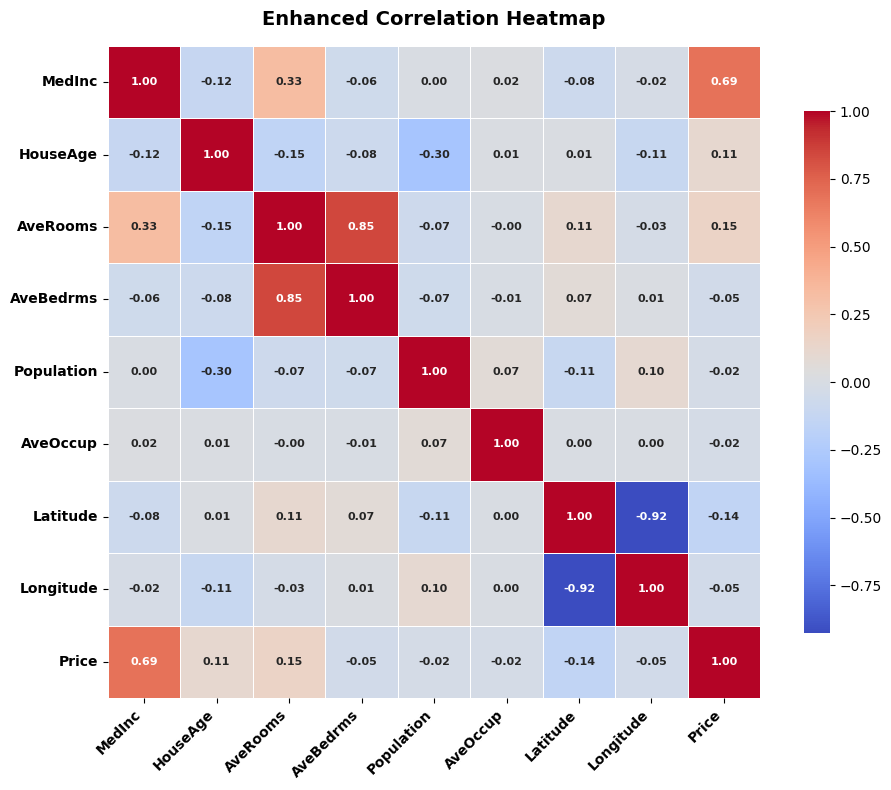

In [11]:
# Create the heatmap with enhancements
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
    square=True,
    annot_kws={"size": 8, "weight": "bold"},
)
plt.title("Enhanced Correlation Heatmap", fontsize=14, fontweight="bold", pad=15)
plt.xticks(fontsize=10, rotation=45, ha="right", weight="bold")
plt.yticks(fontsize=10, weight="bold")
plt.tight_layout()

In [ ]:
# Splitting features and target
X = housing_df.drop(['Price'], axis=1)
y = housing_df['Price']

In [ ]:
# Splitting the dataset into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print("\nDataset split completed:")
print(f"Total samples: {X.shape[0]}, Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


Dataset split completed:
Total samples: 20640, Training samples: 15480, Test samples: 5160


In [ ]:
# Initialize the model
xgb_model = XGBRegressor(random_state=1)

In [ ]:
# Fit the model on the training data
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Evaluate on Training Data
training_data_prediction = xgb_model.predict(X_train)
r2_train = metrics.r2_score(y_train, training_data_prediction)
mae_train = metrics.mean_absolute_error(y_train, training_data_prediction)
print(f"\nTraining Data Evaluation:\nR-squared Error: {r2_train:.4f}\nMean Absolute Error: {mae_train:.4f}")



Training Data Evaluation:
R-squared Error: 0.9465
Mean Absolute Error: 0.1892


In [ ]:
# Evaluate on Test Data
test_data_prediction = xgb_model.predict(X_test)
r2_test = metrics.r2_score(y_test, test_data_prediction)
mae_test = metrics.mean_absolute_error(y_test, test_data_prediction)
print(f"\nTest Data Evaluation:\nR-squared Error: {r2_test:.4f}\nMean Absolute Error: {mae_test:.4f}")



Test Data Evaluation:
R-squared Error: 0.8345
Mean Absolute Error: 0.3090


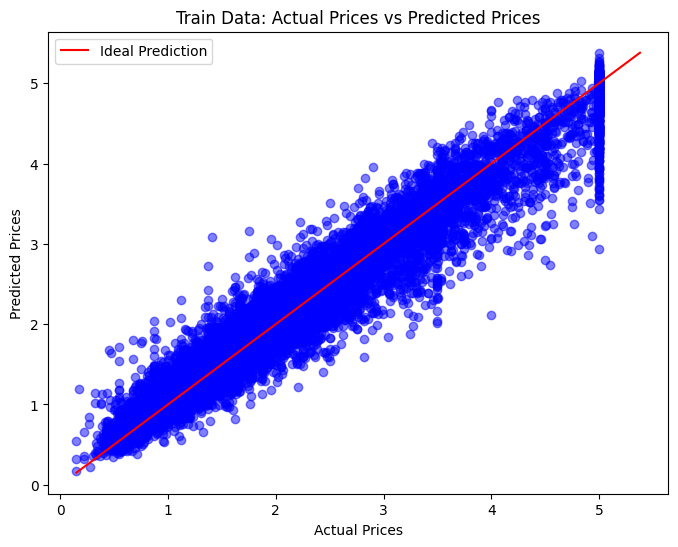

In [ ]:
# Scatter Plot for Test Data
plt.figure(figsize=(8, 6))
plt.scatter(y_train, training_data_prediction, alpha=0.5, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Train Data: Actual Prices vs Predicted Prices")

# Add Ideal Prediction Line
max_val = max(max(y_train), max(training_data_prediction))
min_val = min(min(y_train), min(training_data_prediction))
plt.plot([min_val, max_val], [min_val, max_val], color='red', label='Ideal Prediction')
plt.legend()
plt.show()


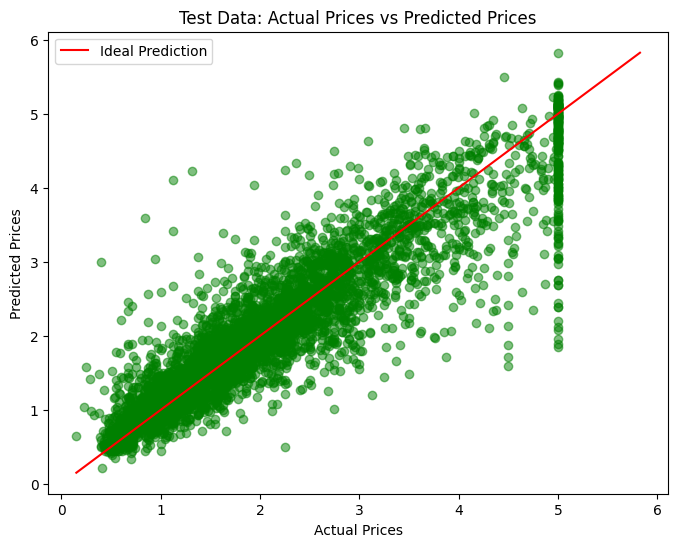

In [ ]:
# Scatter Plot for Test Data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_data_prediction, alpha=0.5, color='green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Test Data: Actual Prices vs Predicted Prices")

# Add Ideal Prediction Line
max_val = max(max(y_test), max(test_data_prediction))
min_val = min(min(y_test), min(test_data_prediction))
plt.plot([min_val, max_val], [min_val, max_val], color='red', label='Ideal Prediction')
plt.legend()
plt.show()


## Considering Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'gamma': [0, 1, 5]
}

grid_search = GridSearchCV(estimator=XGBRegressor(random_state=1),
                           param_grid=param_grid,
                           scoring='r2',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation R2:", grid_search.best_score_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Best cross-validation R2: 0.8469744885816513


In [ ]:
# Evaluate on Training Data
training_data_prediction_gs = grid_search.predict(X_train)
r2_train = metrics.r2_score(y_train, training_data_prediction_gs)
mae_train = metrics.mean_absolute_error(y_train, training_data_prediction_gs)
print(f"\nTraining Data Evaluation:\nR-squared Error: {r2_train:.4f}\nMean Absolute Error: {mae_train:.4f}")



Training Data Evaluation:
R-squared Error: 0.9727
Mean Absolute Error: 0.1371


In [ ]:
# Evaluate on Test Data
test_data_prediction_gs = xgb_model.predict(X_test)
r2_test = metrics.r2_score(y_test, test_data_prediction_gs)
mae_test = metrics.mean_absolute_error(y_test, test_data_prediction_gs)
print(f"\nTest Data Evaluation:\nR-squared Error: {r2_test:.4f}\nMean Absolute Error: {mae_test:.4f}")



Test Data Evaluation:
R-squared Error: 0.8345
Mean Absolute Error: 0.3090


In [ ]:
model = XGBRegressor(
    colsample_bytree=0.8,
    gamma=0,
    learning_rate=0.1,
    max_depth=7,
    n_estimators=300,
    subsample=0.8,
    reg_alpha=1,  # L1 regularization
    reg_lambda=1  # L2 regularization
)


from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", cv_scores)
print("Mean Cross-Validation R²:", np.mean(cv_scores))

Cross-Validation R² Scores: [0.56331138 0.70748529 0.7526741  0.67555553 0.6371212 ]
Mean Cross-Validation R²: 0.6672295003712503


# Transforming the Dataset. Also, consider polynomial features or scaling

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

In [ ]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split transformed data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)


model.fit(X_train, y_train)

# Predictions for Training Data
training_preds = model.predict(X_train)
r2_train = metrics.r2_score(y_train, training_preds)
mae_train = metrics.mean_absolute_error(y_train, training_preds)
print(f"\nTraining Data Evaluation:\nR-squared Error: {r2_train:.4f}\nMean Absolute Error: {mae_train:.4f}")

# Predictions for Test Data
test_preds = model.predict(X_test)
r2_test = metrics.r2_score(y_test, test_preds)
mae_test = metrics.mean_absolute_error(y_test, test_preds)
print(f"\nTest Data Evaluation:\nR-squared Error: {r2_test:.4f}\nMean Absolute Error: {mae_test:.4f}")



Training Data Evaluation:
R-squared Error: 0.9757
Mean Absolute Error: 0.1279

Test Data Evaluation:
R-squared Error: 0.8400
Mean Absolute Error: 0.2966


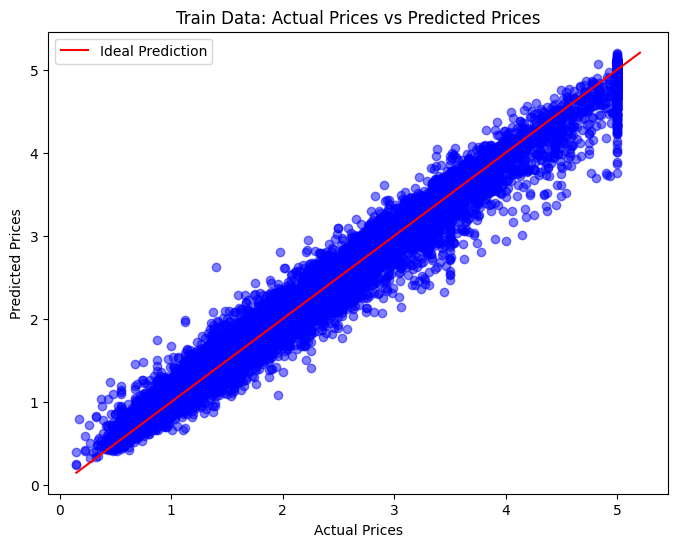

In [ ]:
# Scatter Plot for Test Data
plt.figure(figsize=(8, 6))
plt.scatter(y_train, training_preds, alpha=0.5, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Train Data: Actual Prices vs Predicted Prices")

# Add Ideal Prediction Line
max_val = max(max(y_train), max(training_preds))
min_val = min(min(y_train), min(training_preds))
plt.plot([min_val, max_val], [min_val, max_val], color='red', label='Ideal Prediction')
plt.legend()
plt.show()


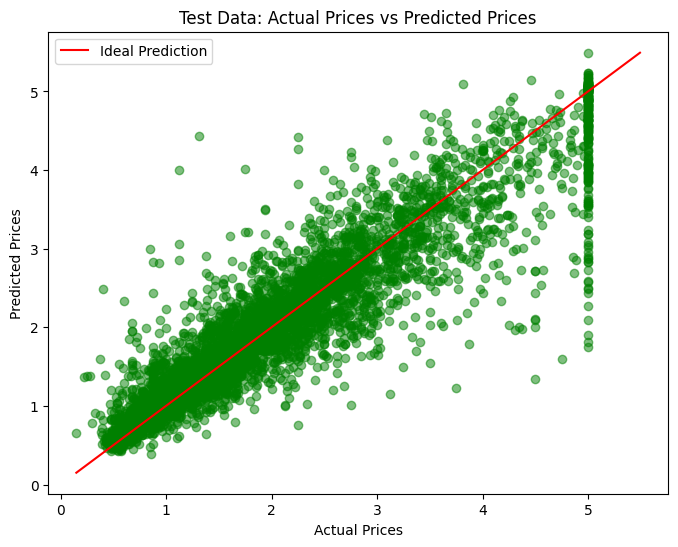

In [ ]:
# Scatter Plot for Test Data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_preds, alpha=0.5, color='green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Test Data: Actual Prices vs Predicted Prices")

# Add Ideal Prediction Line
max_val = max(max(y_test), max(test_preds))
min_val = min(min(y_test), min(test_preds))
plt.plot([min_val, max_val], [min_val, max_val], color='red', label='Ideal Prediction')
plt.legend()
plt.show()


## **Try Different Algorithms**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR

# Initialize different models
models = {
    "Random Forest": RandomForestRegressor(random_state=1),
    "Gradient Boosting": GradientBoostingRegressor(random_state=1),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

# Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = metrics.r2_score(y_test, y_pred)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    print(f"{name} - R2: {r2:.4f}, MAE: {mae:.4f}")


Random Forest - R2: 0.8016, MAE: 0.3312
Gradient Boosting - R2: 0.7769, MAE: 0.3717
Ridge Regression - R2: 0.5930, MAE: 0.5351
Lasso Regression - R2: 0.2889, MAE: 0.7659
SVR - R2: -0.0108, MAE: 0.8613


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=1)
gbr.fit(X_train, y_train)

# Evaluate the model
y_pred_train = gbr.predict(X_train)
y_pred_test = gbr.predict(X_test)

r2_train = metrics.r2_score(y_train, y_pred_train)
mae_train = metrics.mean_absolute_error(y_train, y_pred_train)

r2_test = metrics.r2_score(y_test, y_pred_test)
mae_test = metrics.mean_absolute_error(y_test, y_pred_test)

print(f"GradientBoostingRegressor - Training R2: {r2_train:.4f}, MAE: {mae_train:.4f}")
print(f"GradientBoostingRegressor - Test R2: {r2_test:.4f}, MAE: {mae_test:.4f}")


GradientBoostingRegressor - Training R2: 0.8082, MAE: 0.3535
GradientBoostingRegressor - Test R2: 0.7769, MAE: 0.3717
